In [97]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import seaborn as sns

In [98]:
data = load_boston()

In [99]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [100]:
df['Target'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [101]:
# To have a basic understanding of any continuous variable,we can just do .describe()

df['Target'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: Target, dtype: float64

We get some stats like

max value of price - 50<br>
75% - 25<br>
median - 21<br>
min - 5<br>
mean - 22.53<br>

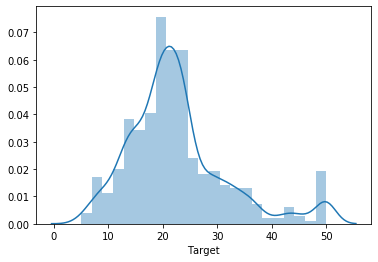

In [102]:
# In order to see how is the distribution we can use sns.distplot to plot it

sns.distplot(df['Target'])

In [103]:
# From the above plot you can see that mean value is somewhat close to 22

In [104]:
# Now there arises two terms for finding relation between two variables

# 1. Correlation

# 2. Covariance


# Both of them are used to establish relationship between two variables.

# A positive value means both are directly proportional.
# Negative value means inversely proportional.


# The difference between correlation and covariance is that covariance measures just the direction of
# relation between two variables(+ve or -ve) whereas correlation measures both strength and direction

In [105]:
df.corr().loc['Target',:]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Target     1.000000
Name: Target, dtype: float64

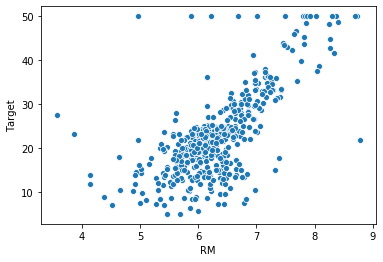

In [106]:
# If you look closely,RM has a positive corr of 0.69 with target
# So ideally if we increase RM,target should increase as well. Lets plot to see this

sns.scatterplot(df['RM'],df['Target'])

In [107]:
# Yes,from the above plot it looks like they are directly proportional

## PCA

PCA is a dimensionality reduction technique that we use to reduce the dimensions of our data(i.e the no of columns).

The reason for doing this is to ensure faster training speed and also removal of any sort of noise if there is.

Note that PCA doesnt always guarantee performance improvement. It guarantees faster training time only.
An intuitive way of understanding why performance improvement doesnt happen is because you are losing some information by reducing dimensions.

However performance might increase if there is significant noise in the dataset

In [108]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# For now dont worry about fit and fit_transform ,that will be explained later.

In [109]:
# PCA works well when your data points are centered well(around mean)


X = df.drop('Target',axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [110]:
X.shape

(506, 13)

In [111]:
std = StandardScaler()

X_std = pd.DataFrame(std.fit_transform(X),columns=X.columns) # This basically centers the data around mean
X_std.head()


# FORMULA

# z = (x - u) / s

# z is the new data point
# x is the original data point
# u is the mean
# s is the standard deviation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [112]:
pca = PCA(n_components=0.95)

X_pca = pca.fit_transform(X_std)

X_pca.shape

(506, 9)

In [96]:
# What essentially PCA has done is it has decomposed the earlier 13 columns into 9 columns
# Also these 9 columns are able to explain 95% variance in the data.

# As explained earlier we did miss out on the 5% variance because of dimensionality reduction.